In [1]:
import numpy as np
from keras.src.utils import image_dataset_from_directory
from keras import models
from keras import layers

train_data = image_dataset_from_directory(
    './train',
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=20,
    image_size=(150, 150),
    shuffle=True,
)

val_data = image_dataset_from_directory(
    './validation',
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=20,
    image_size=(150, 150),
    shuffle=True,
)

test_data = image_dataset_from_directory(
    './test',
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=1,
    image_size=(150, 150),
    shuffle=True,
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [55]:
model = models.Sequential()
model.add(layers.Rescaling(1./255, input_shape=(150, 150, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, validation_data=val_data, epochs=30)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 300ms/step - accuracy: 0.5085 - loss: 0.7337 - val_accuracy: 0.5820 - val_loss: 0.6903
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 298ms/step - accuracy: 0.5712 - loss: 0.6902 - val_accuracy: 0.5610 - val_loss: 0.6708
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 298ms/step - accuracy: 0.6204 - loss: 0.6568 - val_accuracy: 0.6830 - val_loss: 0.5981
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 309ms/step - accuracy: 0.6707 - loss: 0.6123 - val_accuracy: 0.6790 - val_loss: 0.6056
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 310ms/step - accuracy: 0.7013 - loss: 0.5712 - val_accuracy: 0.7040 - val_loss: 0.5880
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 300ms/step - accuracy: 0.7477 - loss: 0.5137 - val_accuracy: 0.7000 - val_loss: 0.5831
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 304ms/step - accuracy: 0.7742 - loss: 0.4643 - val_accuracy: 0.7280 - val_loss: 0.5931
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 299ms/step - accuracy: 0.7996 - loss: 0

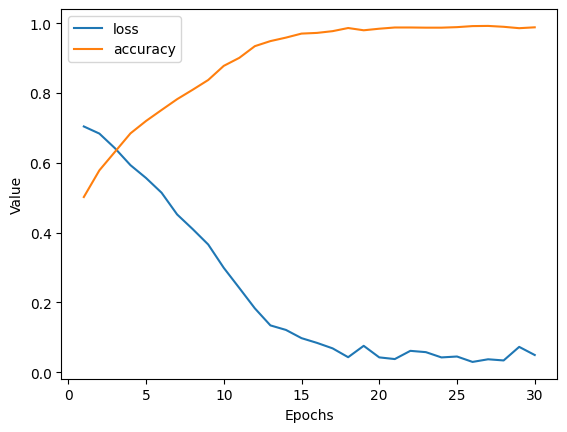

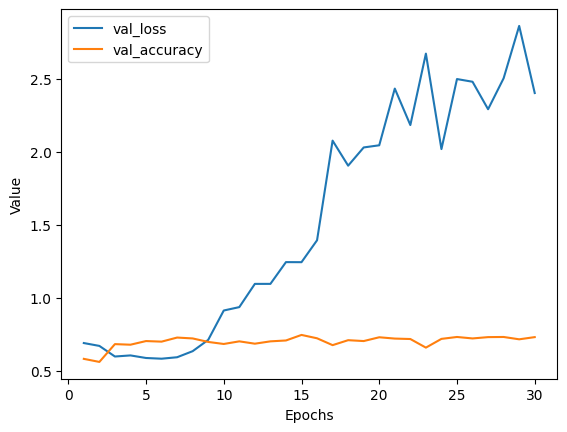

In [57]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='loss')
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='val_loss')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()


In [58]:
test_loss, test_acc = model.evaluate(test_data)
print('test_acc:', test_acc)

model.save('cats_and_dogs.keras')

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6993 - loss: 2.8682
test_acc: 0.7250000238418579


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
[[4.5858225e-05]]
dog


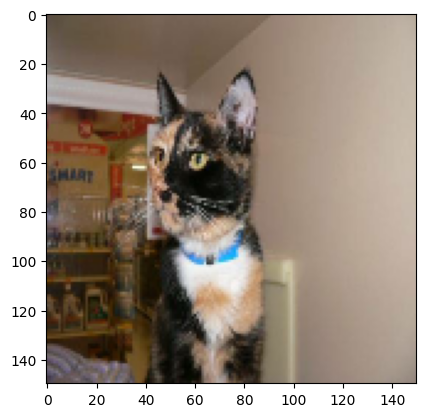

In [4]:
from keras.models import load_model
import random
import matplotlib.pyplot as plt
import cv2

model = load_model('cats_and_dogs.keras')
test_data_list = list(test_data)
random_test_data, _ = random.choice(test_data_list)
predict = model.predict(random_test_data)

print(predict)
if (predict > 0.5):
    print('cat')
else:
    print('dog')

image_array = np.array(random_test_data, dtype=np.uint8)
imgplot = plt.imshow(image_array[0])
